# Netflix Filmleri Kümeleme ( Clustering )

**Bu projede netflixin 584 adet filmini runtime'a göre kümeleyeceğiz**

# Kütüphaneler

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('NetflixOriginals.csv', encoding = "ISO-8859-1")

In [4]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


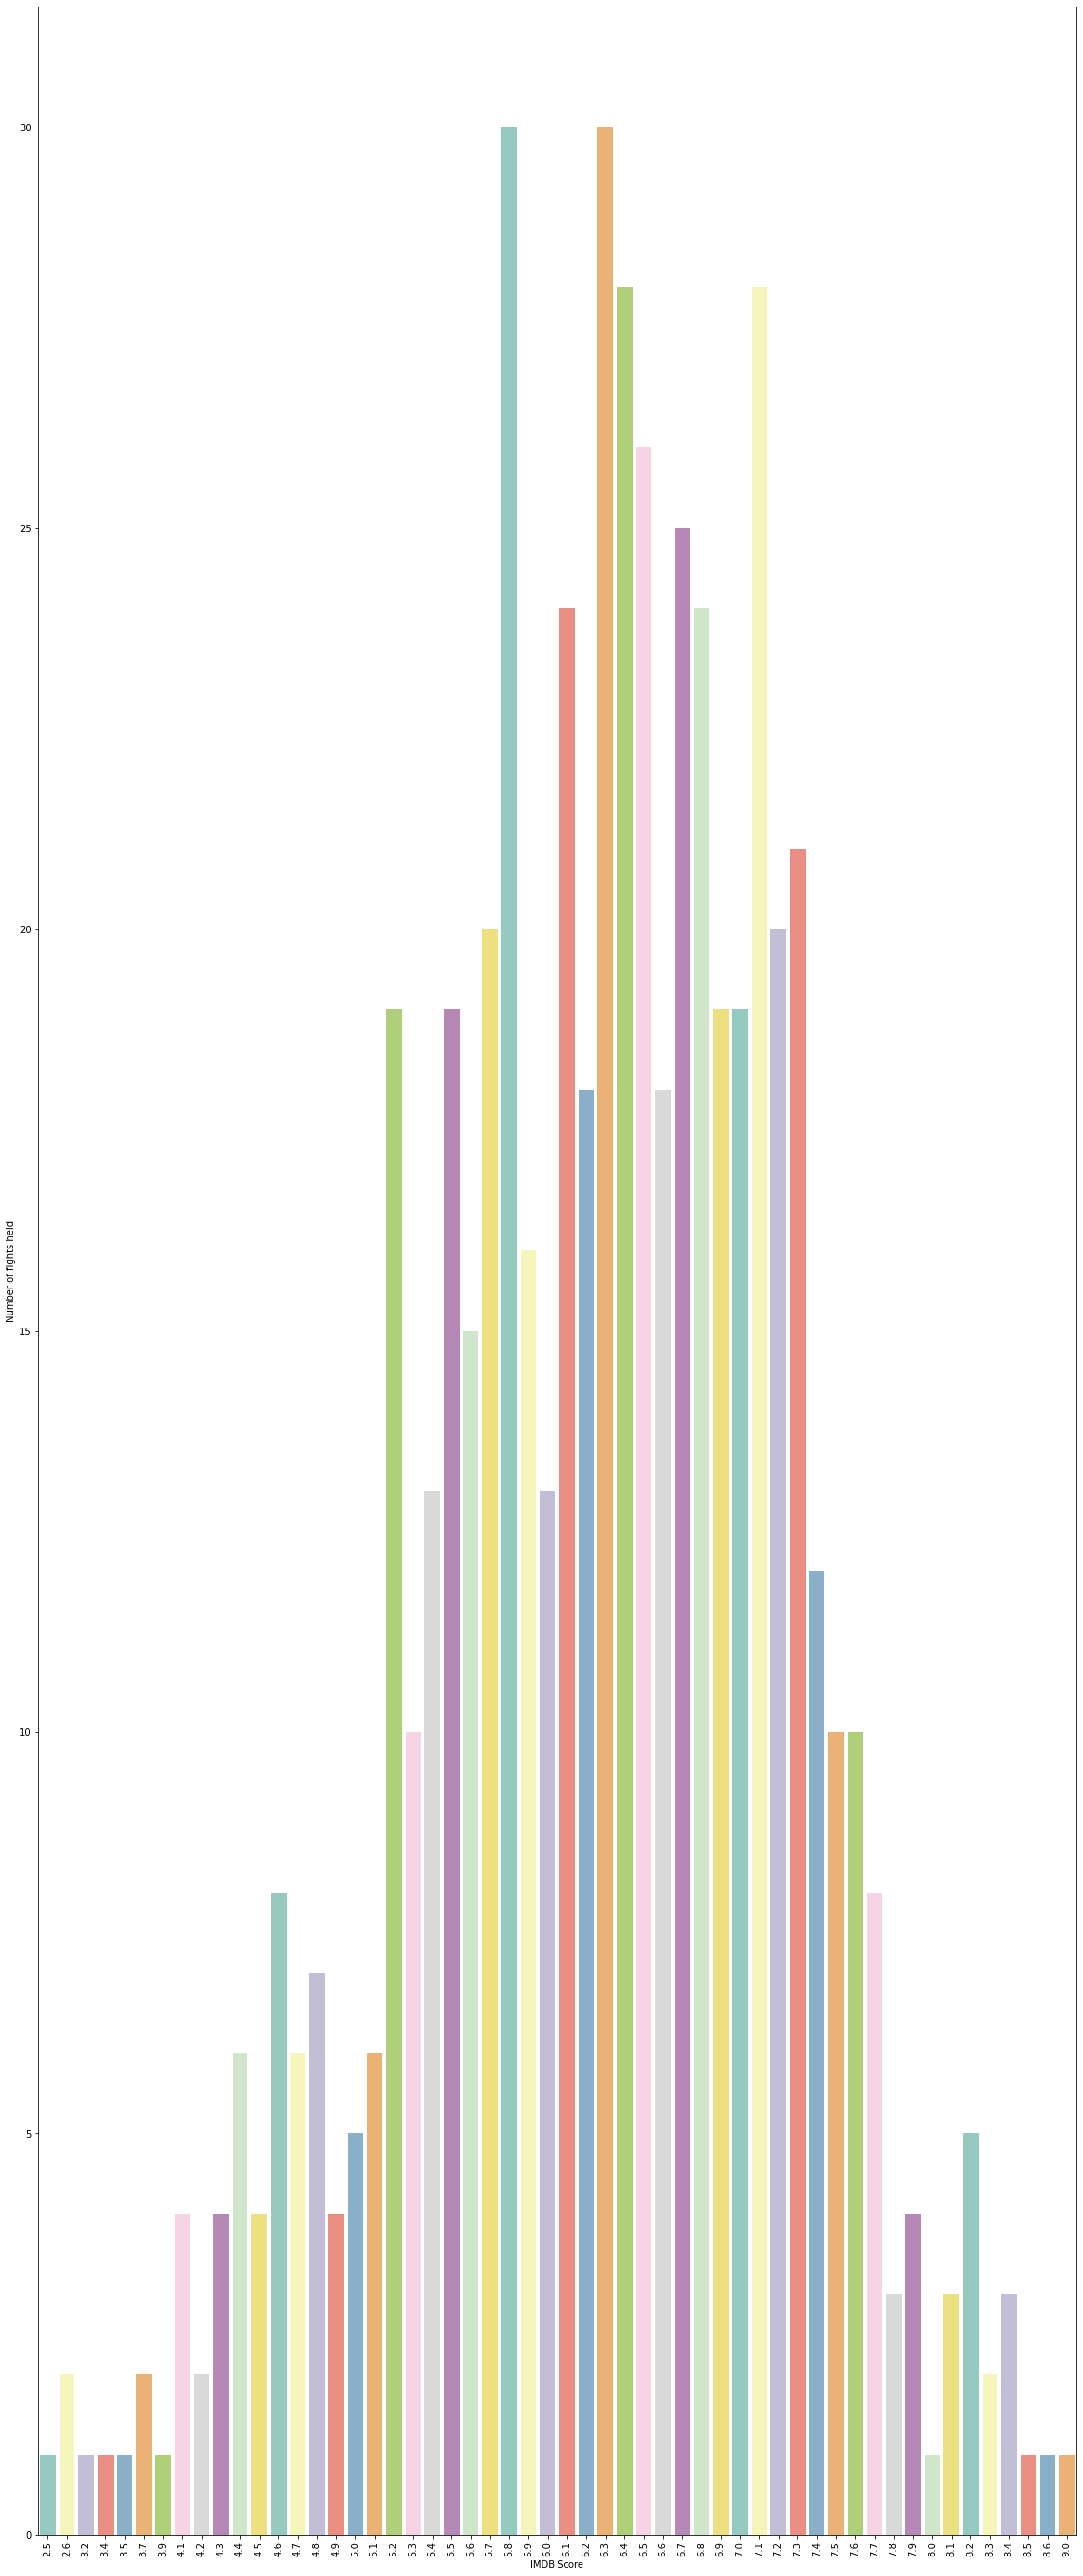

In [5]:
plt.figure(figsize = (20,50))
sns.countplot(x = "IMDB Score", palette = "Set3",data = df)
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

In [6]:
df[df.Runtime == 209]['IMDB Score']

561    7.8
Name: IMDB Score, dtype: float64

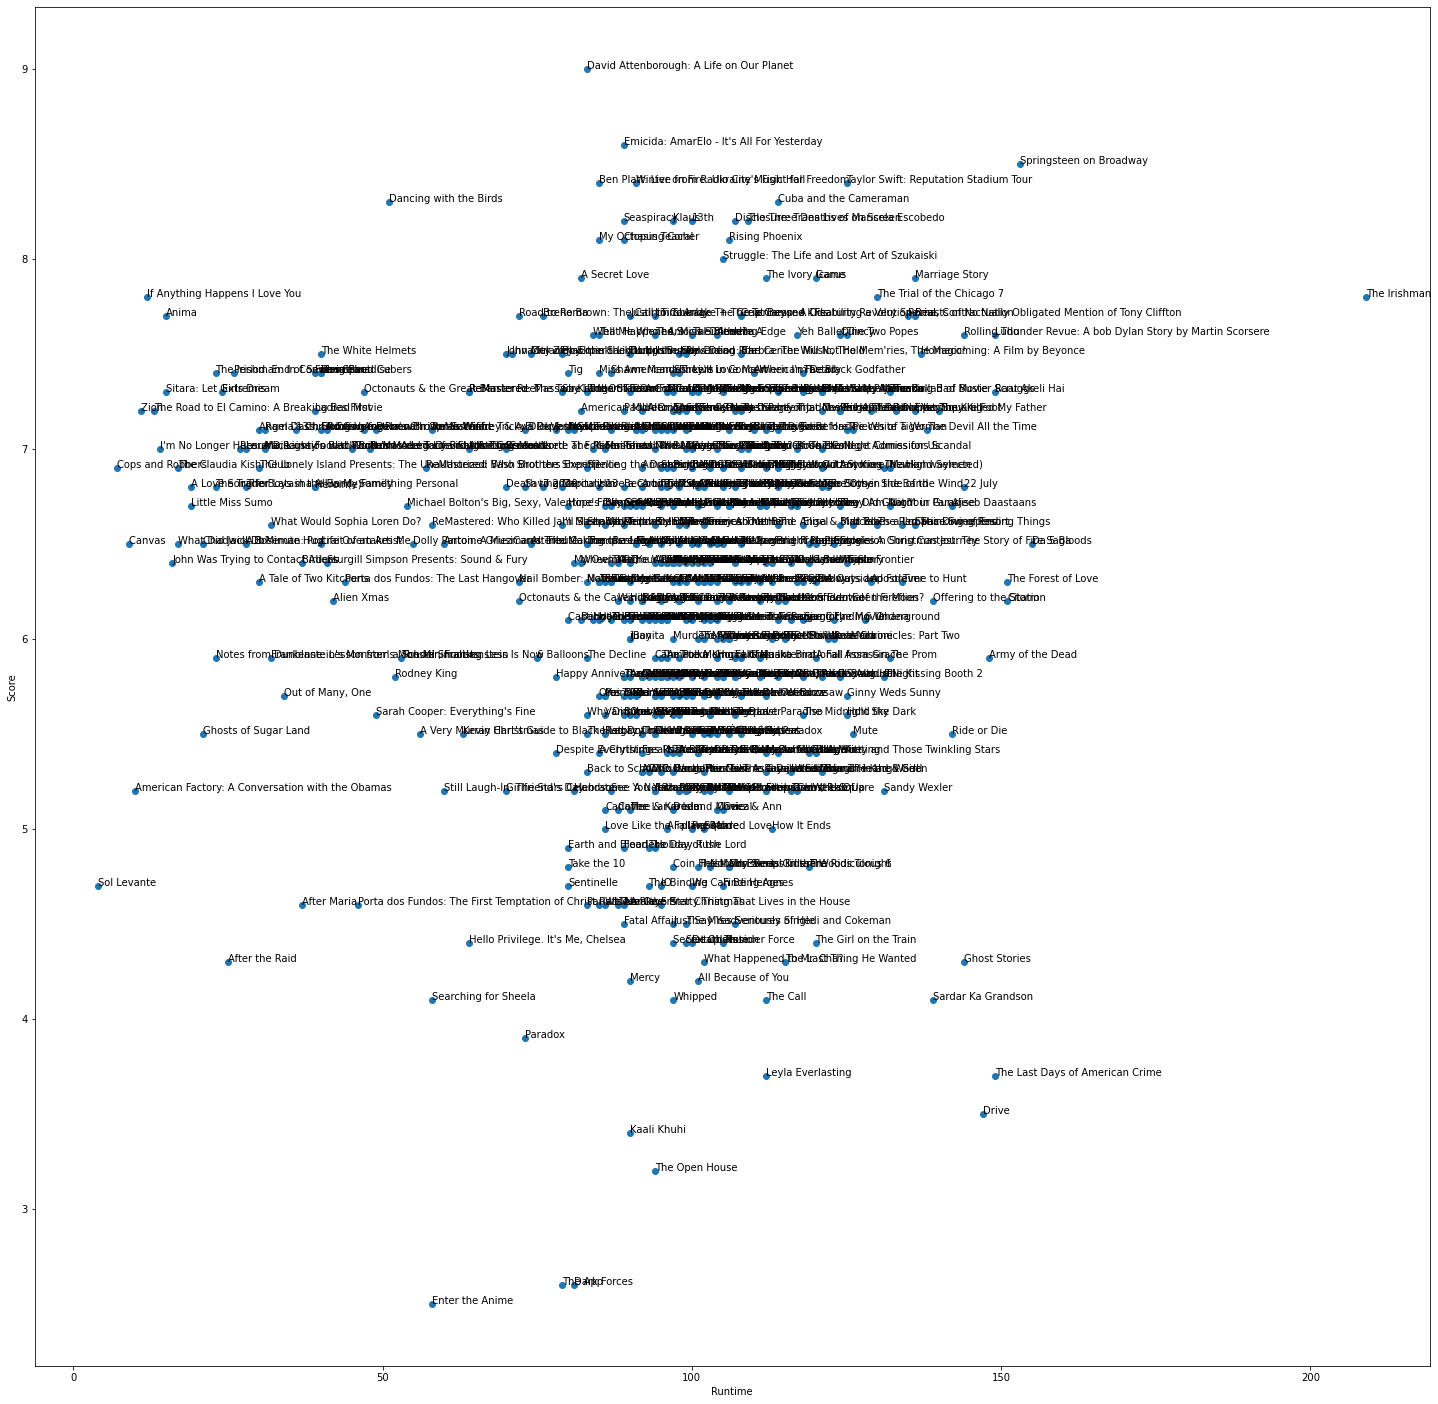

In [13]:
# Havayolu firmalarının genel olarak nerede toplandığının görseli
from sklearn.preprocessing import scale
x = df['Runtime'] # Havayolu firmasının yaptığı sefer sayısı
y = df['IMDB Score'] # havayolu firmasının taşıdığı yolcu sayısı
plt.figure(figsize = (25,25))
plt.scatter(x, y)
plt.xlabel("Runtime")
plt.ylabel("Score")
for i, txt in enumerate(df.Title):
    plt.annotate(txt, (x[i], y[i])) # txt havayolu firmasının ismi
plt.show()

In [ ]:
# Havayolu firmalarının genel olarak nerede toplandığının görseli
from sklearn.preprocessing import scale
x = airline_count.values # Havayolu firmasının yaptığı sefer sayısı
y = passenger_count.values # havayolu firmasının taşıdığı yolcu sayısı
plt.figure(figsize = (10,10))
plt.scatter(x, y)
plt.xlabel("Flights held")
plt.ylabel("Passengers")
for i, txt in enumerate(airline_count.index.values):
    plt.annotate(txt, (x[i], y[i])) # txt havayolu firmasının ismi
plt.show()

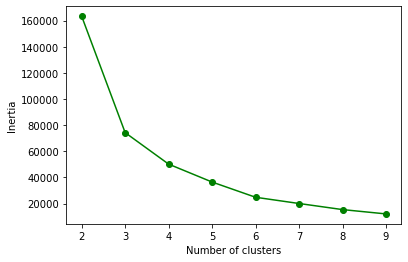

In [16]:
# Dirsek metodu n_cluster sayısını verir bize

from sklearn.cluster import KMeans
X = np.array(list(zip(x,y)))
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(2,10), inertias, "o-g")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

C:\Users\MONSTERHAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\MONSTERHAN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


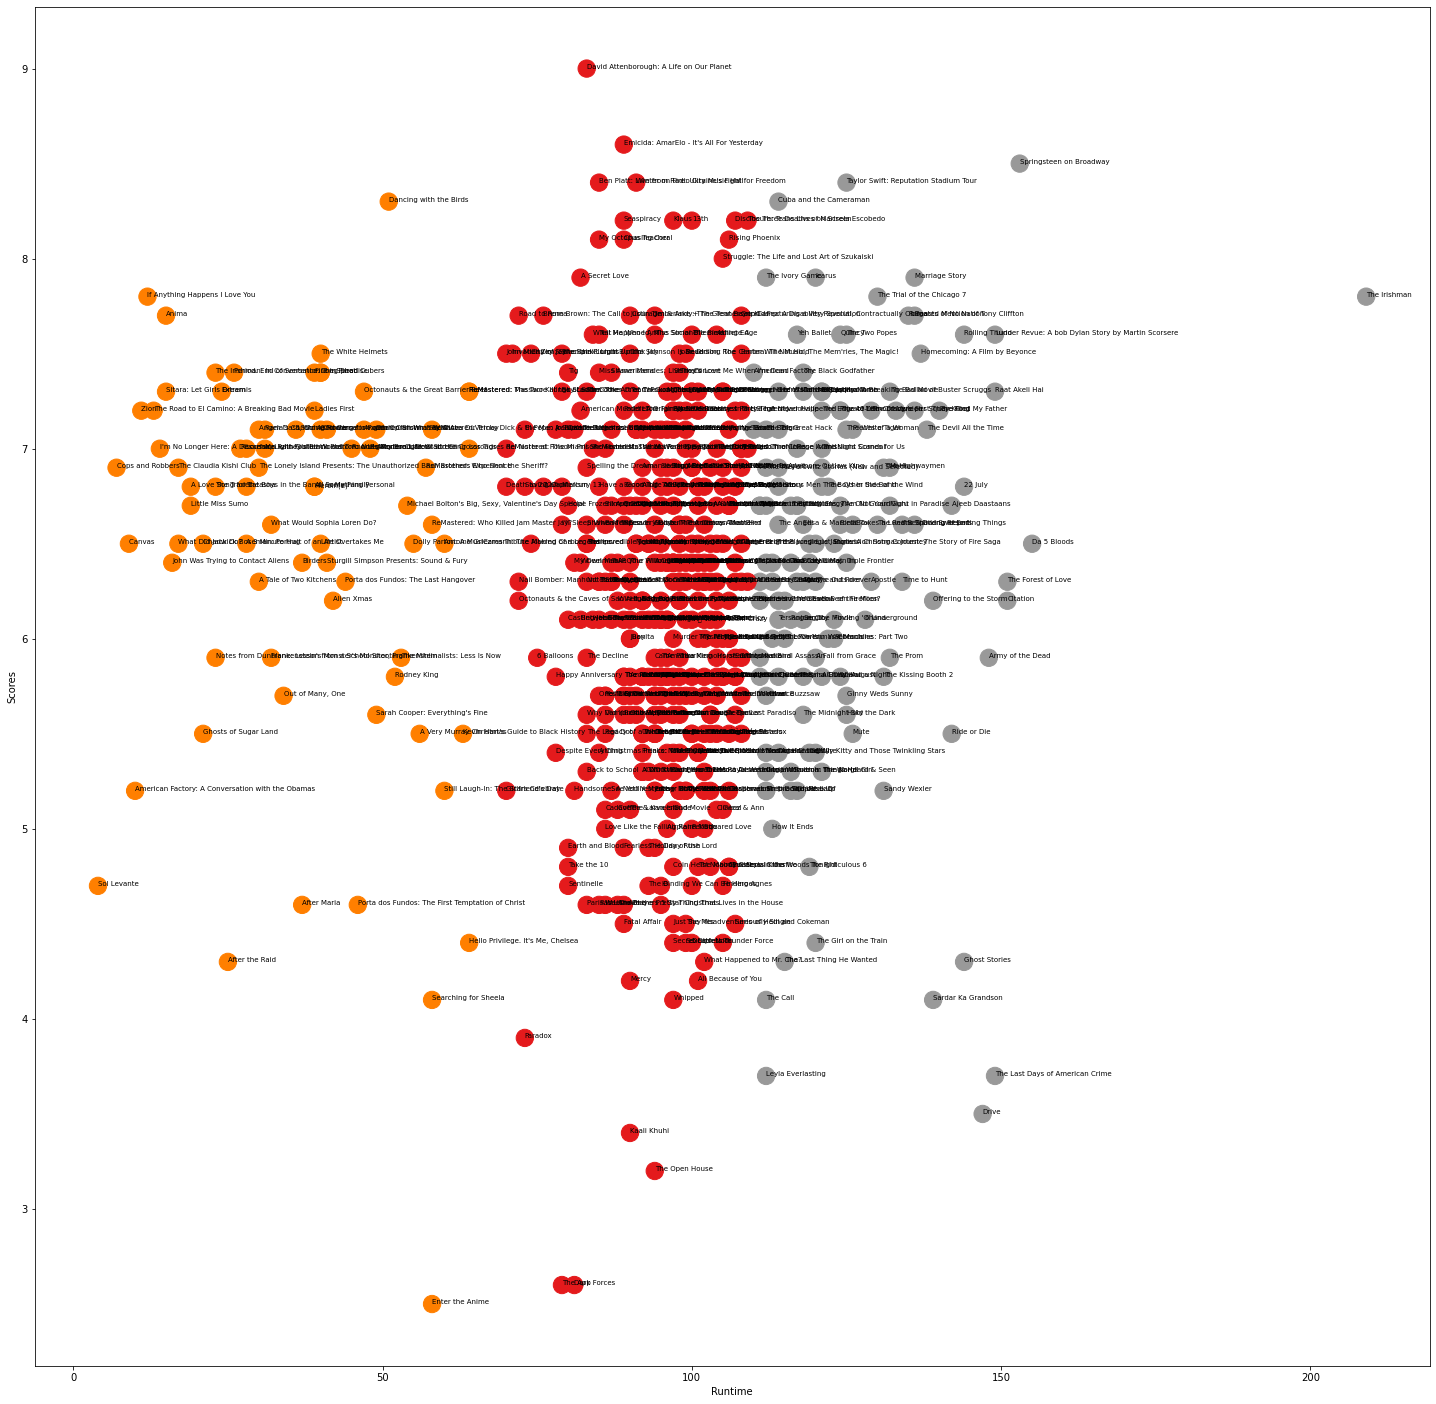

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.figure(figsize = (25,25))
plt.xlabel("Runtime")
plt.ylabel("Scores")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=300, cmap='Set1')
for i, txt in enumerate(df.Title):
    plt.annotate(txt, (X[i,0], X[i,1]), size = 7)
plt.show()